逻辑回归基于线性回归，并引入了 Sigmoid函数，将回归问题转换为二元分类问题的函数；

Linear regression: $$Z=W^TX$$
Logistic regression: $$Y=Sigmoid(Z)$$
$$y=\operatorname{Sigmoid}(W^TX),W\in\mathcal{R}^{n\times1},X\in\mathcal{R}^{n\times m},Y\in\mathcal{R}^{1\times m}$$


则正类的预测概率为：$$p_+=\mathrm{y}=\frac{1}{1+e^{-z}}=\frac{1}{1+e^{-W^TX}}$$

负类的预测概率为：$$\begin{gathered}
p_{-}=1-p_{+}=1-\mathrm{y} \\
=1-\frac{1}{1+e^{-Z}}=\frac{e^{-Z}}{1+e^{-Z}}=\frac{1}{e^{Z}+1}=\frac{1}{1+e^{W^{T}X}} 
\end{gathered}$$

几率函数：
$$odds=\frac{p_+}{p_-}=\frac{\frac{1}{1+e^{-Z}}}{\frac{e^{-Z}}{1+e^{-Z}}}=e^Z$$

对数几率函数（可看出与线性回归方程相同）：
$$\ln(odds)=\ln(e^{Z})=z=W^{T}X$$

在线性回归中，我们通过最大似然估计的思想推导损失函数，假设样本分布的概率，并将最大化对数似然函数等价于最小化损失函数。而在逻辑回归中，我们也可以使用相同的思想来推导损失函数。

在逻辑回归中，我们关注的是分类问题，即预测一个样本属于两个类别中的哪一个。逻辑回归使用sigmoid函数将线性模型的输出映射到0到1之间的概率值，表示样本属于某一类别的概率。然后，我们可以将这个概率视为二项分布中的参数，并基于这个参数推导出对数似然函数。

对数似然函数为：
$$ \ln(\mathrm{Prob}(D))=\sum_{i=1}^my_i\ln\left(\frac{p_-i}{1\mathrm{p_i}}\right)+\ln(1-p_i)$$

$$loss=\sum_{i=1}^{m}y_{i}W^{T}x_{i}-\ln\left(1+e^{W^{T}x_{i}}\right)$$

但我们一般使用以下形式：
$$\text{loss }=-\left(\sum_{i=1}^my_i\ln(p_i)+(1-y_i)\ln(1-p_i)\right)$$

根据梯度下降得到:
$$\frac{\partial\operatorname{loss}}{\partial W}=X(P-Y)^{T} $$

与损失相同，如果损失是所有样本的平均值，即除以样本数m，则梯度也必须除以m。

基于以上，我们开始模型训练：

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score,recall_score, f1_score

In [2]:
path='D:/machine learning data/logistic regress/ex2data1.txt'
data=pd.read_csv(path,header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
X_data=data.iloc[:,:2]
y_data=data.iloc[:,-1:]

In [4]:
#将数据划分为训练集测试集
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2,random_state=60)
(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

((80, 2), (80, 1), (20, 2), (20, 1))

In [5]:
mu=np.mean(X_train,axis=0)
sigma=np.std(X_train,axis=0)
normalized_X_train=(X_train-mu)/sigma
normalized_X_test=(X_test-mu)/sigma

In [6]:
#添加偏置项
normalized_X_train.insert(0, 'Ones', 1)
normalized_X_test.insert(0, 'Ones', 1)

In [7]:
X=normalized_X_train.values
y=y_train.values

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
feature_dim=X.shape[1]
W=np.zeros((feature_dim,1))#初始化W系数矩阵，维度为（n，1）(n为特征维度而不是样本数)

In [10]:
loss_lambda=0.01
def computeCost(X,Y,W):
    P=sigmoid(np.dot(X,W)) #(80,3@3,1=80,1)
    #Y=Y.values.reshape(-1,1)
    loss=np.sum(-Y*np.log(P)-(1-Y)*np.log(1-P))/X.shape[0]+(loss_lambda/ 2) * np.sum(W[:,0:] ** 2)
    return loss,P

In [11]:
def gradientDecent(W,X,Y):
    P=sigmoid(np.dot(X,W))
    grad=X.T@(P-Y)/X.shape[0]+loss_lambda*W[:,0:]
    db = (1 /X.shape[0]) * np.sum(P - Y)
    W-=alpha*grad
    W[0]+=-alpha*db
    return W

In [12]:
W_his=[]
def logisticRegression(X,Y,alpha,iters):
    feature_dim=X.shape[1]
    W=np.zeros((feature_dim,1))
    for i in range (iters):
        W=gradientDecent(W,X,Y)
        W_new=W.copy()
        W_his.append(W_new)
    return W_his

In [13]:
alpha=0.001
iters=30000
W_his=logisticRegression(X,y,alpha,iters)

In [14]:
def predict (W,X):
    probability=sigmoid(np.dot(X,W))
    y_hat=(probability>=0.5)
    return probability,y_hat

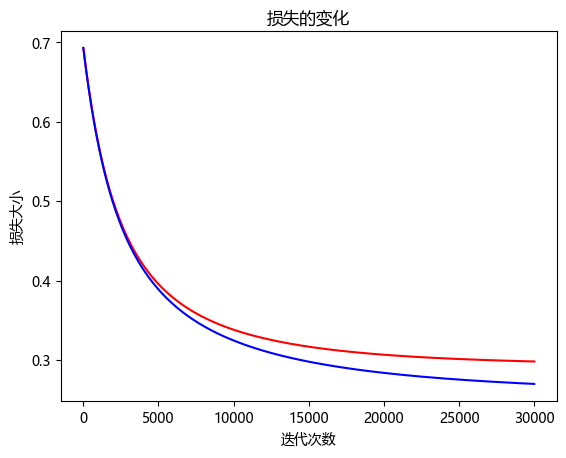

In [15]:
train_loss = []
test_loss = []
iter_range = range(1, iters + 1)  # 使用迭代次数的范围

for i in W_his:
    loss1,P1 = computeCost(normalized_X_train, y_train, i)
    train_loss.append(loss1)
    loss2,P2 = computeCost(normalized_X_test, y_test, i)
    test_loss.append(loss2)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font",family='Microsoft YaHei')

plt.plot(iter_range, train_loss, 'r',label='训练集损失')  # 使用迭代次数的范围
plt.plot(iter_range, test_loss, color='blue',label='测试集损失')  # 使用迭代次数的范围
plt.xlabel('迭代次数')
plt.ylabel('损失大小')
plt.title('损失的变化')
plt.show()


In [16]:
P,Y_hat=predict(W,normalized_X_test)
PP,YY_hat=predict(W,normalized_X_train)

AUC: 0.9880952380952381
Precision: 0.7
Recall: 1.0
F1 Score: 0.8235294117647058


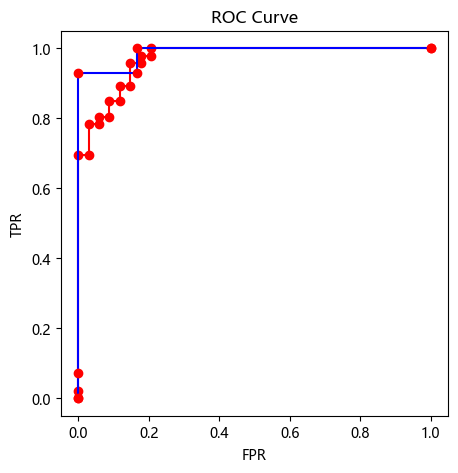

In [17]:
fpr1, tpr1, thresholds1 = roc_curve(y_train, P1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, P2)
plt.figure(figsize=(5,5))
plt.plot(fpr1,tpr1,color='r',label='训练集')
plt.plot(fpr1,tpr1,'ro')
plt.plot(fpr2,tpr2,color='blue',label='测试集')
plt.plot(fpr2,tpr2,'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title("ROC Curve")
auc_value=auc(fpr2,tpr2)
precision = precision_score(y_test, Y_hat)
recall = recall_score(y_test, Y_hat)
f1 = f1_score(y_test,Y_hat)
print("AUC:", auc_value)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)